1. (3 балла) С помощью requests скачайте главную страницу https://meduza.io/ . Для каждой новости получите как давно она была опубликована. Постройте гистограму, где по x будет время в часах, а по y - количество новостей в данный час.

2. (3 балла) На страничке постеров к Звездным войнам скачайте каждый из постеров: https://www.kinopoisk.ru/film/zvyozdnye-voyny-poslednie-dzhedai-2017-718223/posters/ . Воспользуйтесь requests и beatiful soup.

3. (3 балла) На сайте https://auto.ru/ в шапке представлены марки автомобилей и рядом количество объявлений. Загрузите сайт с помощью requests, с помощью beautiful soup получите информацию о марках и соответствующих числах. Постройте countplot, где по x будет марка, а по y - количество объявлений.

4. (3 балла) На сайте https://www.kaggle.com/competitions?sortBy=prize&group=general&page=1&pageSize=100 представлены соревнования по машинному обучению, скачайте сайт с помощью requests. Для каждого сореванония из html сайта получите призовой фонд и количество команд-учатников. Отсортируйте соревнования по количеству команд. Постройте график, в котором по x будет количество команд-участников, а по y - размер призового фонда. 

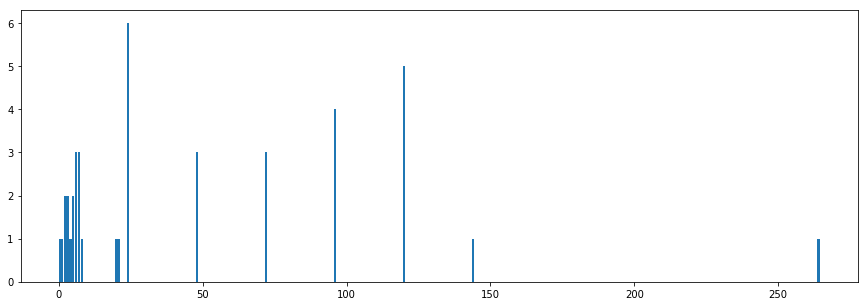

In [39]:
#(3 балла) С помощью requests скачайте главную страницу https://meduza.io/ . 
# Для каждой новости получите как давно она была опубликована. 
# Постройте гистограму, где по x будет время в часах, а по y - количество новостей в данный час.

import requests
from bs4 import BeautifulSoup
import collections
from matplotlib import pylab as plt

def parse_time_string(time_str):
    if 'минуту' == time_str.split()[0]:
        return round(1/60,2)
    if 'мин' in time_str:
        return round(float(time_str.split()[0])/60,2)
    if 'час' == time_str.split()[0]:
        return 1
    if 'час' in time_str:
        return float(time_str.split()[0])
    if 'день' == time_str.split()[0]:
        return 24
    if 'дн' in time_str:
        return float(time_str.split()[0])*24
    

response = requests.get('https://meduza.io/')

if response.status_code == 200:
    past_hours_news = []
    soup = BeautifulSoup(response.text, 'html.parser')
    times = soup.find_all('time', {"class": 'Timestamp-root'})
    for time in times:
        past_hours_news.append(parse_time_string(time.text))
    
    counter=collections.Counter(past_hours_news)
    plt.figure(figsize=(15, 5))
    plt.bar(list(counter.keys()), height = list(counter.values()) )
    plt.show()


In [67]:
#(3 балла) На страничке постеров к Звездным войнам скачайте каждый из постеров: 
# https://www.kinopoisk.ru/film/zvyozdnye-voyny-poslednie-dzhedai-2017-718223/posters/ . 
# Воспользуйтесь requests и beatiful soup.

import requests
from bs4 import BeautifulSoup
import urllib

for i in range(1,3):
    response = requests.get('https://www.kinopoisk.ru/film/718223/posters/page/'+ str(i) +'/')

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        posters = soup.find_all('img', {'width': '170'})
        for poster in posters:
            urllib.request.urlretrieve(poster['src'], 'posters/' + poster['src'].split('_')[1])



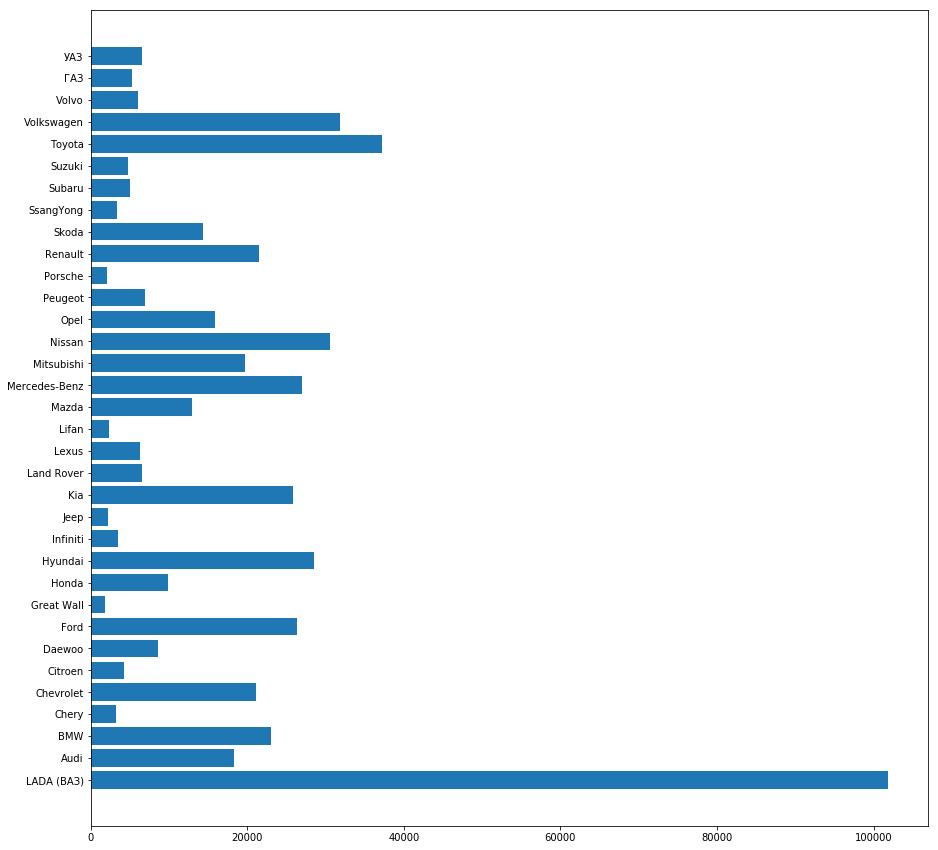

In [163]:
#(3 балла) На сайте https://auto.ru/ в шапке представлены марки автомобилей и рядом количество объявлений. 
# Загрузите сайт с помощью requests, с помощью beautiful soup получите информацию о марках и соответствующих числах. 
# Постройте countplot, где по x будет марка, а по y - количество объявлений.

import requests
from bs4 import BeautifulSoup
import pandas as pd 
import seaborn as sns
from matplotlib import pylab as plt

response = requests.get('https://auto.ru/')
response.encoding = 'UTF-8'

if response.status_code == 200:
      
   # cars_count_df = pd.DataFrame(index = ['Name', 'Count'])
    cars_count_list = []
    cars_count_dict = {}
    
    soup = BeautifulSoup(response.text, 'html.parser')
    cars = soup.find_all('a', {'class': 'IndexMarks__item'}) 
    for car in cars:
        name = car.find('div', {'class': 'IndexMarks__item-name'})
        count =  car.find('div', {'class': 'IndexMarks__item-count'})
        cars_count_list.append([str(name.text), int(count.text)])
        cars_count_dict[str(name.text)] = int(count.text)

    cars_count_df = pd.DataFrame(cars_count_list, columns = ['Name', 'Count'])
    
    # !!! countplot - не предназначен для подобных данных !!!
    # разве что создать свой df и заполнить поле название ровно таким количесвом каждой марки 
    # какое указано в count , что есть глупость для решения задачи
    #sns.countplot(x = 'Name', data = cars_count_df)
    
    plt.figure(figsize=(15, 15))
    plt.barh(list(cars_count_dict.keys()),width = list(cars_count_dict.values()) )
    plt.show()


In [200]:
#(3 балла) На сайте https://www.kaggle.com/competitions?sortBy=prize&group=general&page=1&pageSize=100 
# представлены соревнования по машинному обучению, скачайте сайт с помощью requests. 
# Для каждого сореванония из html сайта получите призовой фонд и количество команд-учатников. 
# Отсортируйте соревнования по количеству команд. 
# Постройте график, в котором по x будет количество команд-участников, а по y - размер призового фонда.

import requests
from bs4 import BeautifulSoup
from matplotlib import pylab as plt

competitions_list = []
i = 1
finish = False

#while(finish == False):
for i in range(1,2):
    response = requests.get('https://www.kaggle.com/competitions?sortBy=prize&group=general&page='+ str(i) +'&pageSize=100')
    response.encoding = 'UTF-8'
    #i = i + 1
    print('https://www.kaggle.com/competitions?sortBy=prize&group=general&page='+ str(i) +'&pageSize=100')
    if response.status_code == 200:
        
        soup = BeautifulSoup(response.text, 'html.parser')
        competitions = soup.find_all('div') 
        print(len(competitions))
        for competition in competitions:
             a = competition.contents
       #     found = competition.find('p').text
       #     count_of_teams = competition.find('span').text
       #     competitions_list.append([count_of_teams,found])
       #     print(competition)
       #     print(count_of_teams, found)
       #     if '$' not in found:
       #         finish = True
        
        print(len(competitions))
        print(competitions[4]) # Судя по выводу контент генеритсяjs а работу с такими страницами мы еще не проходили ^_^

        
        


https://www.kaggle.com/competitions?sortBy=prize&group=general&page=1&pageSize=100
9
<div data-component-name="ViewCompetitionList" style="display: flex; flex-direction: column; flex: 1 0 auto;"></div>
